# Projeto 01: Comparação de algoritmos de aprendizagem de máquina na análise de risco de crédito


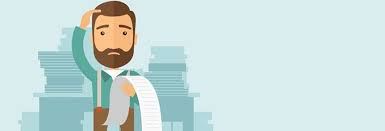

# **Imports**

In [58]:
import pandas as pd, numpy as np, os, re, math, time
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns 
import scikitplot as skplt
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import ipywidgets as widgets
import joblib
import _pickle as cPickle

# **Carrregando os dados**

Utilizou-se a base de  dados de acesso livre “German Credit Data”, fornecido pelo Prof. Dr. Hans Hofmann da 
Universidade de Hamburgo, acessado pelo repositório “Center for Machine Learning and  Intelligent Systems (UCI)”.

Abaixo o link para Download do Dataset e Dados Completos:

https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

# **Metodologia CRISP-DM**

O “Cross Industry Standard Process for Data Mining [CRISP-DM]” trata-se de um modelo de processo, com seis etapas Shearer (2000), ilustrado na Figura 1. Está sendo amplamente utilizada para ajudar a planejar e desenvolver projetos de ciência de dados.

  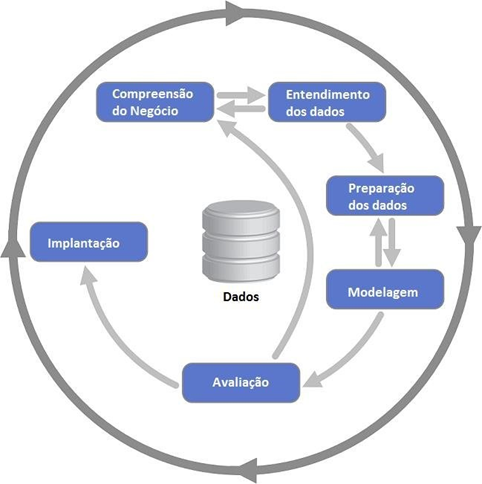
  
  Figura 1: Etapas do Framework CRISP-DM 
  


# **1. Compreensão do Negócio**

### Contextualização do problema de negócio:




### Sobre os dados:
    
O conjunto de dados do Banco Alemão contém informações sobre 1.000 clientes que  solicitaram empréstimo no passado e contém 20 variáveis independentes (3 numéricas e 18  categóricas) relacionadas ao perfil desses solicitantes. A marcação de um cliente ruim para  um crédito já concedido pode variar de acordo com as definições internas do banco, mas  geralmente estão relacionadas ao atraso no pagamento da(s) parcela(s) em um determinado  tempo, no caso do presente estudo não foi disponibilizada a descrição de qual conceito foi  utilizado, contendo apenas o status de risco do crédito, sendo 0 para cliente ruim e 1 para  cliente bom, informação essa que será utilizada como variável resposta do modelo.

Quando um cliente solicita um pedido de crédito, o banco precisa identificar o perfil  desse cliente para decidir se realiza ou não a aprovação desse empréstimo, para não ter  prejuízos no caso de o cliente não pagar o valor concedido, ou seja, se uma empresa oferece  crédito ao seu cliente, sempre existe o risco de que seus clientes não paguem. Assim, a  construção de modelos de risco de crédito é utilizada nessa decisão, pois a partir de  informações dos perfis demográficos e socioeconômicos dos clientes que já solicitaram  empréstimo no passado é possível estimar a probabilidade de inadimplência em empréstimos 
de novos clientes, possibilitando uma melhor qualidade na concessão do empréstimo,  reduzindo a inadimplência e aumentando a receita.

      
        
### Objetivo :
        
 Uso de algoritmos de aprendizado de máquina para um problema de risco de crédito, visando identificar  qual apresenta o melhor desempenho na previsão de inadimplência. A medida de ajuste adotada na comparação de desempenho dos 
modelos será o processo de validação cruzada estratificada 10 “folds” para  a métrica da área abaixo da curva “receiver operating characteristic [ROC]”.

                
        
### Proposta de solução:


Implementação e comparação de modelos de aprendizado de máquina do tipo supervisionado para uma tarefa de classificação para prever a probabilidade de inadimplência na concessão de crédito
 


### Estrategia Adotada para solução do problema de negócio:


A Estrategia adotada é criar modelos de aprendizado de máquina que possa prever a probabilidade de inandimplência na concessão de crédito, para isso a construção do projeto seguiu as etapas do CRISP-DM destacadas abaixo:


* 01. Compreensão dos dados


Já descrita acima.


* 02. Entendimento dos dados

 Analisar o dataset como dimensoes, formatos e dados faltantes. As tarefas realizadas foram: Dimensao dos Dados, Tipo dos Dados nas Colunas, Volume de Dados Faltantes NA's e análise exploratória de dados (EDA) do tipo univariada, bivariada e multivariada.


* 03. Preparação dos Dados

Preparar os dados brutos a fim de adequá-los para etapas de modelagem. As tarefas relizadas foram: Separação dos dados em treinamento e teste, Exclusão de variáveis irrelevantes para o negócio e transformação dos dados.


* 04. Modelagem


Implementacao de 6 modelos de Machine Learning utilizando os seguintes algoritmos: Regressão logística, árvore de decisão, Random Forest e XGBoost.Utilização  do processo de validação cruzada estratificada com 10 folds e uso da técnica de GridSerch para otimização dos hiperparâmetros


* 05. Avaliação

 
 Uso das principais métricas de avaliação de modelos de aprendizado de máquina para uma tarefa de classificação: área abaixo da Curva ROC, Matriz de Confusão e  KS


* 06. Implementação

Criação de uma proposta de uso da solução com o modelo que apresentar a melhor performance de acordo com as métricas do item 5.

# **2. Entendimento dos dados**

Esta etapa consiste desde a captura dos dados até a identificação de problemas relacionados à qualidade. Nesta fase é também onde se formam hipóteses em cima do que se aprendeu com os dados.

# 2.1. Importação dos Dados

In [61]:
path_data = 'german_credit.csv'

df = pd.read_csv(path_data)
df.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


# 2.2. Dimensão dos dados

In [29]:
print( 'Número de instâncias do dataset : {}'.format( df.shape[0] ) )
print( 'Número de atributos do dataset: {}'.format( df.shape[1] ) )

Número de instâncias do dataset : 1000
Número de atributos do dataset: 21


# 2.3. Check dados duplicados

In [30]:
# drop duplicates
df.duplicated().sum()

0

### Análise e Insights

 - Não foram encontradas instâncias duplicadas no dataset

# 2.4. Análise Exploratória de dados (EDA) - Visão geral do dataset

O objetivo deste etapa é fazer dois tipos de explorações sob os dados:


* Enriquecer o conjunto de dados (dataset) com o levantamento de metadados como dimensão, tipos de atributos e medidas de resumo;

* Explorar analiticamente o dataset com o uso de estatística descritiva (medida de tendência central, variabilidade) e métodos gráficos para se ter ideias de tipos de análises que podem ser realizadas. Como aqui se trata da primeira exploração de dados, a seguir serão definidas algumas propostas de análises com a finalidade de tornar os estudos mais bem direcionados.

# 2.4.1.Identificar o tipo e natureza de cada variável

Dentre os tipos de variáveis que podemos encontrar ao tratar os dados, existem as numéricas, ou quantitativas (por exemplo: peso, comprimento, temperatura), e as categóricas, ou qualitativas (por exemplo: gênero, nacionalidade) conforme apresentado na figura 2.

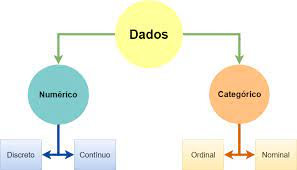

  
  Figura 2: Tipo e Natureza de um atributo/Variável 
  


In [31]:
pd.DataFrame.info(df);

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account Balance                    1000 non-null   int64
 2   Duration of Credit (month)         1000 non-null   int64
 3   Payment Status of Previous Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit Amount                      1000 non-null   int64
 6   Value Savings/Stocks               1000 non-null   int64
 7   Length of current employment       1000 non-null   int64
 8   Instalment per cent                1000 non-null   int64
 9   Sex & Marital Status               1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration in Current address        1000 non-null   int64
 12  Most valuable availab

### Análise e Insights

- A base de dados contém 21 variáveis e 1.000 observações


- Todas as variáveis estão como (int64),entretanto algumas dessas variáveis são de natureza qualitativa, mas foram categorizadas, conforme apresentado acima.


# 2.4.2. Identificando a variável target (alvo) do problema de negócio

O objetivo do estudo é identificar o perfil de clientes inadimplentes e criar um modelo de aprendizado de máquina
para prever o evento. De acordo com a descrição do dataset contido na plataforma UCI, a variável 'Creditability' é a variável 
que contém esse rótulo, ou seja: O recurso 'Creditability' assume "1" em caso de bom crédito e "0" caso contrário.

In [32]:
df['Creditability'].value_counts()

1    700
0    300
Name: Creditability, dtype: int64

In [33]:
df['Creditability'].value_counts()/df.shape[0]

1    0.7
0    0.3
Name: Creditability, dtype: float64

Text(0.5, 1.0, 'Distribuição da variável resposta')

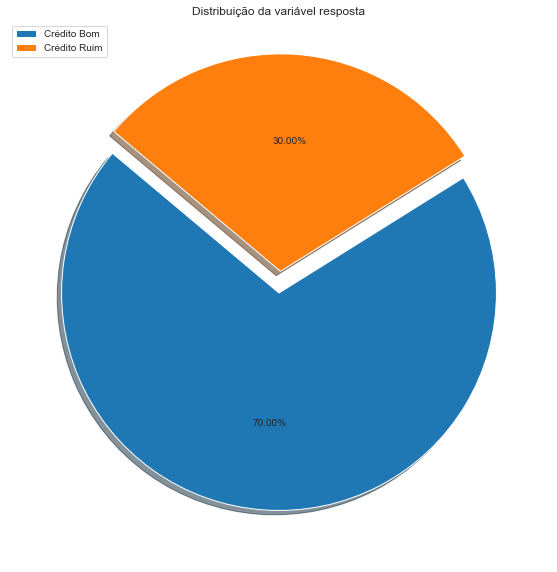

In [34]:
plt.figure(figsize=(10,10))
explode = [0, 0.1]
plt.pie(df['Creditability'].value_counts(), explode=explode, autopct='%1.2f%%', shadow=True,startangle=140)
plt.legend(labels=['Crédito Bom','Crédito Ruim'])
plt.title('Distribuição da variável resposta')

### Análise e Insights:

 - Observa-se que existe um desbalanceamento entre as classes da variável resposta, sendo 70% dos solicitantes com bom risco de crédito (Adimplentes) e 30% com risco de crédito ruim (Inadimplentes).
 
 
 - Entretanto, mesmo existindo um desbalanceamento entre as classes da variável resposta, acredito que não seja um problema de evento raro, logo, não irá fazer parte desse estudo nenhuma técnica de balanceamento amostral

# 2.4.3. Exploração dos dados (medidas descritivas, distribuição das variáveis)

In [35]:
# Dataset somente com variáveis numéricas

num_attributes=df[['Duration of Credit (month)','Credit Amount','Age (years)']]


# Dataset somente com variáveis categóricas

cat_attributes = df[['Payment Status of Previous Credit',
 'Creditability',
 'Foreign Worker',
 'Most valuable available asset',
 'No of Credits at this Bank',
 'Telephone',
 'Type of apartment',
 'Concurrent Credits',
 'Account Balance',
 'Duration in Current address',
 'Purpose',
 'Occupation',
 'Sex & Marital Status',
 'Value Savings/Stocks',
 'Length of current employment',
 'No of dependents',
 'Guarantors',
 'Instalment per cent']]


## 2.4.3.1. EDA das Variáveis Numéricas

In [36]:
num_attributes.describe()

,Duration of Credit (month),Credit Amount,Age (years)
count,1000.000000,1000.00000,1000.00000
mean,20.903000,3271.24800,35.54200
std,12.058814,2822.75176,11.35267
min,4.000000,250.00000,19.00000
25%,12.000000,1365.50000,27.00000
50%,18.000000,2319.50000,33.00000
75%,24.000000,3972.25000,42.00000
max,72.000000,18424.00000,75.00000


# 2.4.3.1.1.Distribuições das variáveis Numéricas

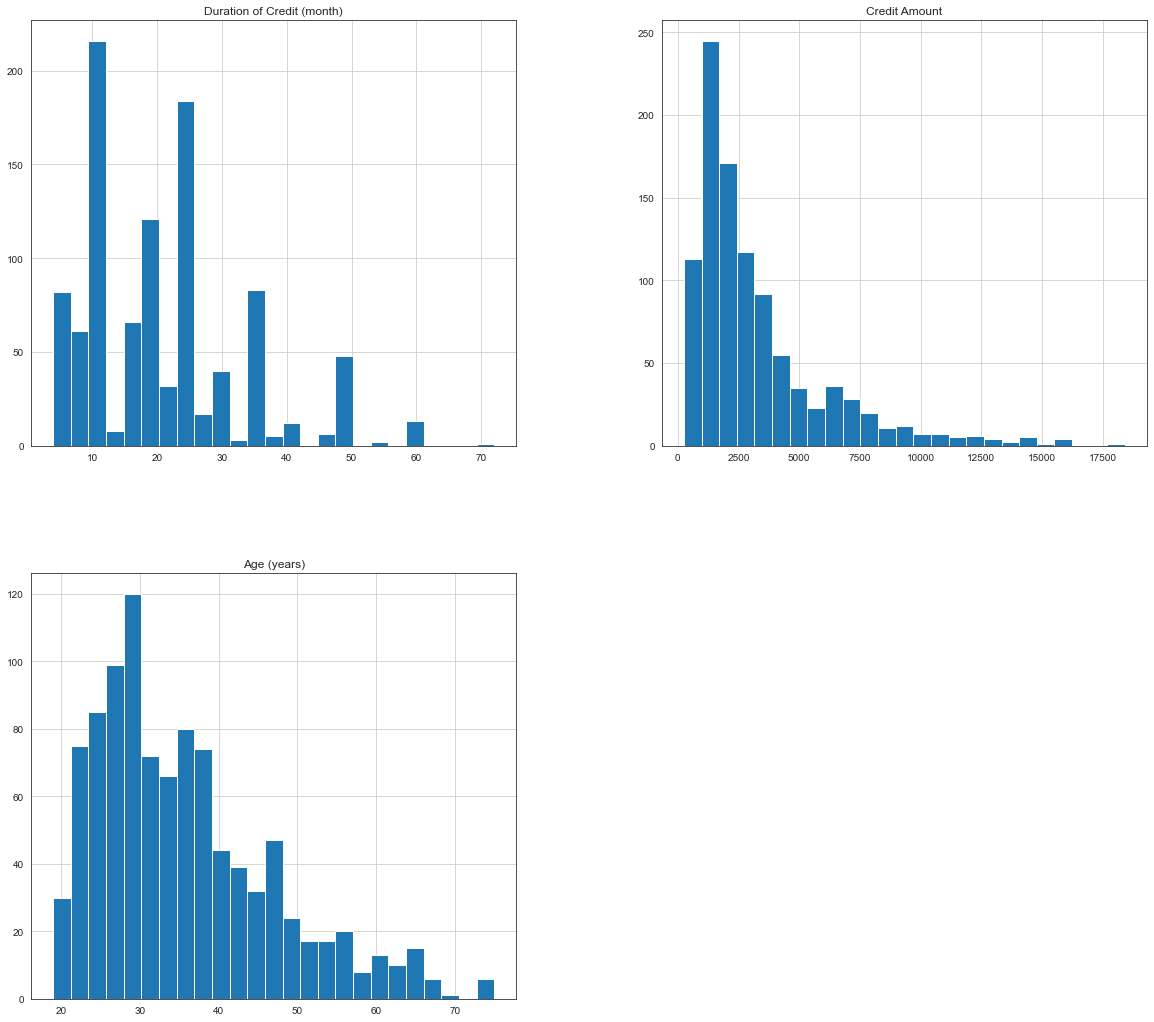

In [37]:
num_attributes.hist(bins=25, figsize=(20,18));

### Análises e Insights

#### Variáveis numéricas


 -  A variável 'Duration of Credit (month)' refere-se ao tempo em meses do relacionamento do cliente/solicitante com o banco. E de acordo com as estatísticas descritivas, a média do tempo de relacionamento são de 20 meses, ou seja, quase 2 anos. Observa-se também que o cliente com menor tempo de relacionamento possui 4 meses e o maior é de 72 meses (6 anos).


- A variável 'Credit Amount' é o valor solicitado pelo cliente, e aqui podemos ver que a média do empréstimo é de 3.271 sendo o valor mínimo de 250 e máximo de 18 mil.


- A idade média dos solicitantes de crédito é de 35 anos, com mínimo de 19 e máximo de 75 anos.


# 2.4.3.2. Matriz de correlação

A presença de um elevado grau de correlação entre as variáveis explicativas pode introduzir uma série de inconvenientes em modelos de predição, como o problema de multicolinearidade (SÍCSU, 2010). Outro fator importante em analisar o grau de correlação entre as variáveis independentes é possibilitar a redução de dimensionalidade, tornando o modelo mais simples, permitindo escolher uma entre elas.

Assim, a análise de correlação é uma abordagem do tipo “filter”, e o seu coeficiente varia de -1 a 1. Quanto mais próximo de 1, existe uma forte correlação positiva. Quanto mais próximo de -1, existe uma forte correlação negativa. Por fim, coeficientes próximos de zero, significam que não há correlação linear. O tipo de correlação que será utilizada é a de person, pois todas asa variáveis são numéricas.

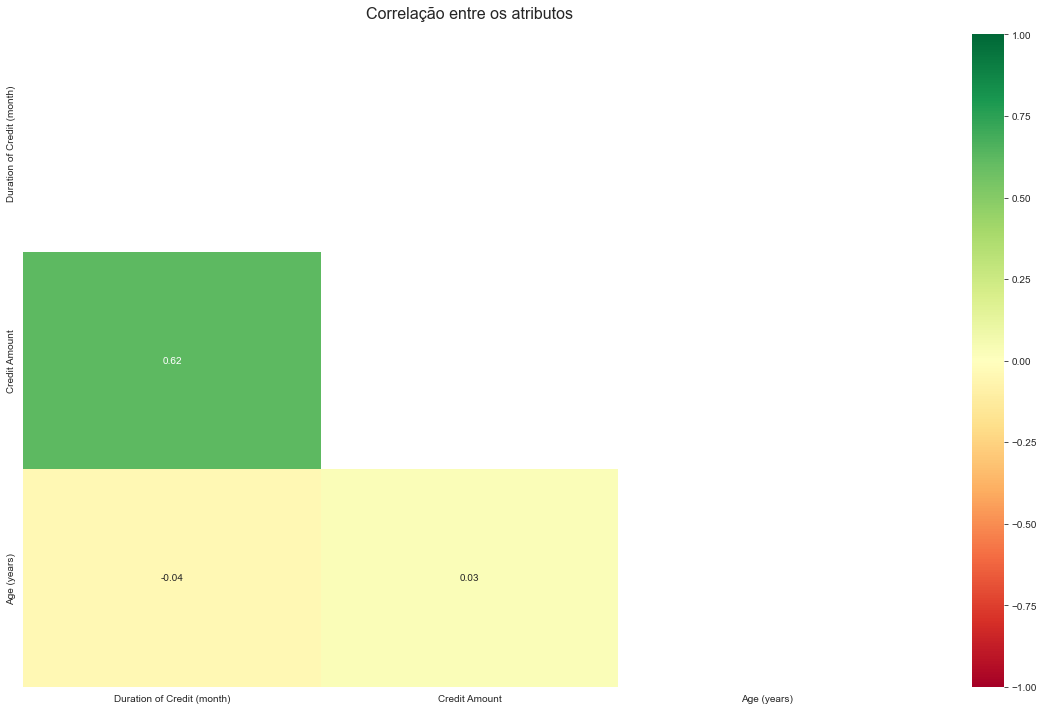

In [38]:
#Criando uma matriz de correlação
plt.figure(figsize=(20, 12))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(num_attributes.corr( method='pearson').round(2), dtype=bool))
heatmap = sns.heatmap(num_attributes.corr( method='pearson').round(2), mask=mask, vmin=-1, vmax=1, annot=True, cmap="RdYlGn",square=False,center=0)
heatmap.set_title('Correlação entre os atributos', fontdict={'fontsize':16}, pad=16);

In [39]:
cor_matrix = num_attributes.corr().abs()

In [40]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))

In [41]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.6)]
to_drop

['Credit Amount']

### Análise e Insights

Analisando a correlação entre as  variáveis independentes:

Essa verificação é importante para indicar problema de  multicolinearidade, que pode invalidar a capacidade de generalização de modelos preditivos.  Com a matriz de correlação de Pearson foi possível observar que existe  correlação elevada maior do que 0,6 entre as variáveis Credit Amount e duration, logo a variável credit_amount foi descartada do dataset

In [62]:
df = df.drop(columns = ['Credit Amount'])

# 2.4.3.2.2.Distribuições das variáveis Categóricas

## 2.4.3.2. EDA das Variáveis Categóricas

In [43]:
cat_attributes.apply( lambda x: x.unique().shape[0] )

Payment Status of Previous Credit     5
Creditability                         2
Foreign Worker                        2
Most valuable available asset         4
No of Credits at this Bank            4
Telephone                             2
Type of apartment                     3
Concurrent Credits                    3
Account Balance                       4
Duration in Current address           4
Purpose                              10
Occupation                            4
Sex & Marital Status                  4
Value Savings/Stocks                  5
Length of current employment          5
No of dependents                      2
Guarantors                            3
Instalment per cent                   4
dtype: int64

C:\Users\jam06\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jam06\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jam06\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jam06\anaconda3\lib\si

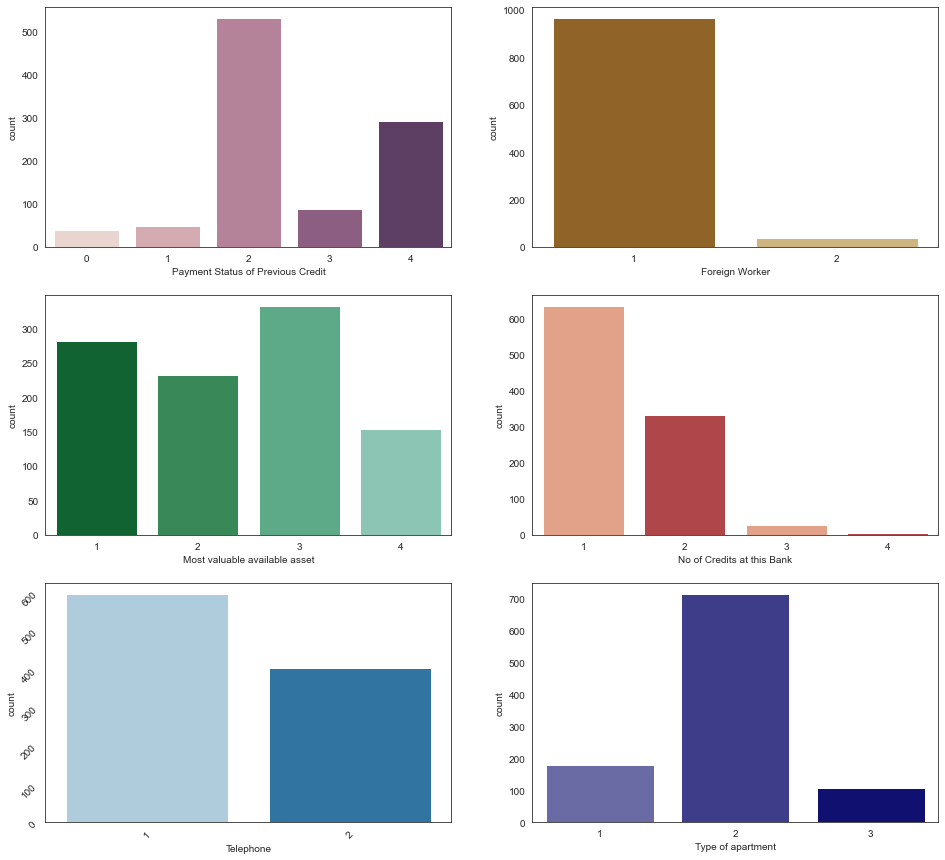

In [44]:
sns.set_style('white') 
fig, ax = plt.subplots(3,2,figsize=(16,15))
sns.countplot(df['Payment Status of Previous Credit'], ax=ax[0][0], palette=sns.cubehelix_palette())
sns.countplot(df['Foreign Worker'], ax=ax[0][1], palette=sns.color_palette('BrBG'))
sns.countplot(df['Most valuable available asset'], ax=ax[1][0], palette=sns.color_palette('BuGn_r'))
sns.countplot(df['No of Credits at this Bank'], ax=ax[1][1],palette=sns.color_palette('RdBu_r')[4:])
sns.countplot(df['Telephone'], ax=ax[2][0], palette=sns.color_palette('Paired'))
sns.countplot(df['Type of apartment'], ax=ax[2][1],palette=sns.light_palette('navy')[3:])

ax[2][0].tick_params(labelrotation=45)


C:\Users\jam06\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jam06\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jam06\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jam06\anaconda3\lib\si

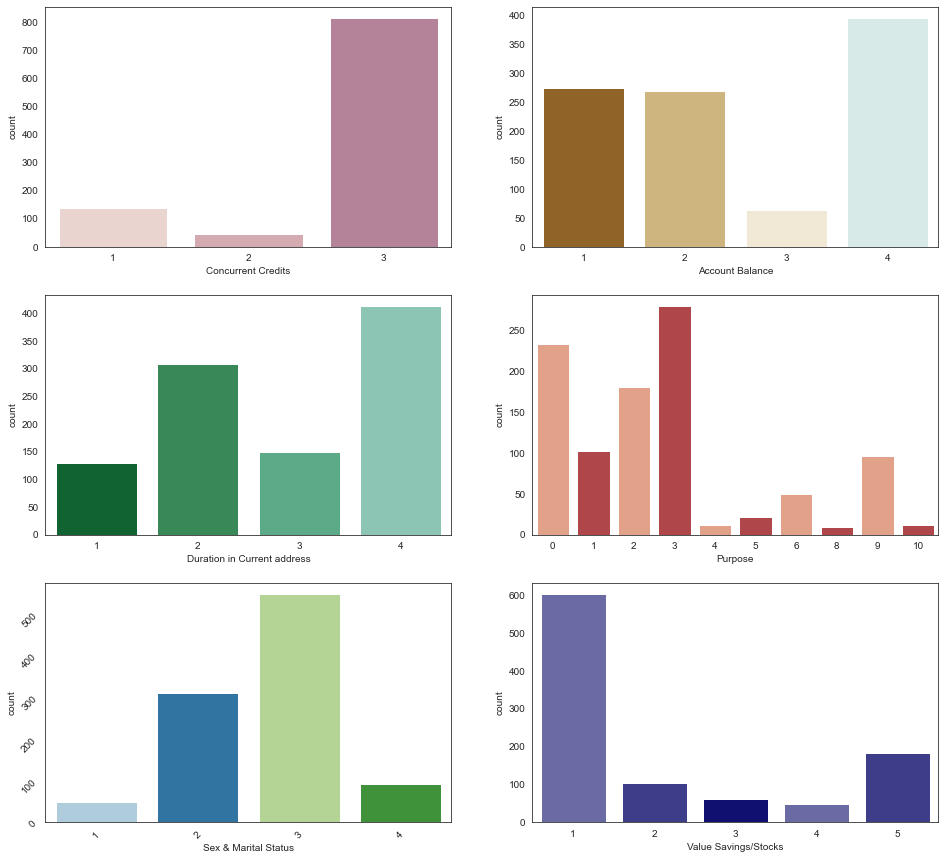

In [18]:
sns.set_style('white') 
fig, ax = plt.subplots(3,2,figsize=(16,15))
sns.countplot(df['Concurrent Credits'], ax=ax[0][0], palette=sns.cubehelix_palette())
sns.countplot(df['Account Balance'], ax=ax[0][1], palette=sns.color_palette('BrBG'))
sns.countplot(df['Duration in Current address'], ax=ax[1][0], palette=sns.color_palette('BuGn_r'))
sns.countplot(df['Purpose'], ax=ax[1][1],palette=sns.color_palette('RdBu_r')[4:])
sns.countplot(df['Sex & Marital Status'], ax=ax[2][0], palette=sns.color_palette('Paired'))
sns.countplot(df['Value Savings/Stocks'], ax=ax[2][1],palette=sns.light_palette('navy')[3:])

ax[2][0].tick_params(labelrotation=45)



C:\Users\jam06\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jam06\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jam06\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jam06\anaconda3\lib\si

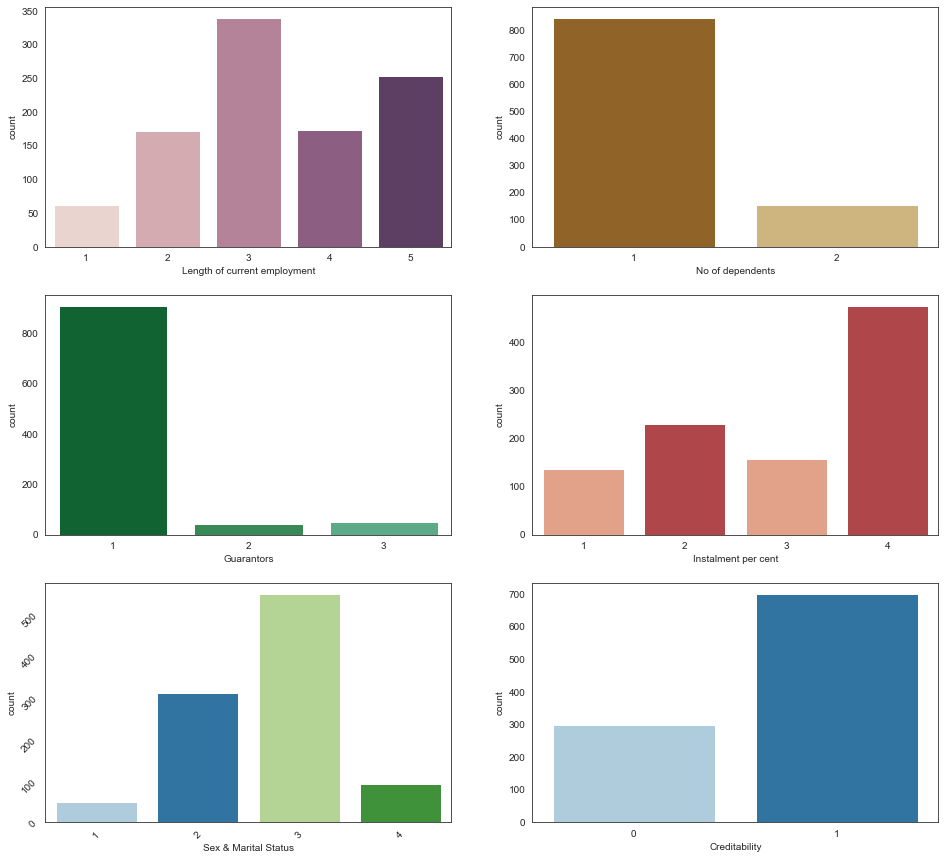

In [25]:
sns.set_style('white') 
fig, ax = plt.subplots(3,2,figsize=(16,15))
sns.countplot(df['Length of current employment'], ax=ax[0][0], palette=sns.cubehelix_palette())
sns.countplot(df['No of dependents'], ax=ax[0][1], palette=sns.color_palette('BrBG'))
sns.countplot(df['Guarantors'], ax=ax[1][0], palette=sns.color_palette('BuGn_r'))
sns.countplot(df['Instalment per cent'], ax=ax[1][1],palette=sns.color_palette('RdBu_r')[4:])
sns.countplot(df['Sex & Marital Status'], ax=ax[2][0], palette=sns.color_palette('Paired'))
sns.countplot(df['Creditability'], ax=ax[2][1], palette=sns.color_palette('Paired'))

ax[2][0].tick_params(labelrotation=45)

## 2.4.3.3. Data type

In [63]:
df[['Payment Status of Previous Credit','Foreign Worker','Most valuable available asset'
    ,'No of Credits at this Bank','Telephone','Type of apartment','Concurrent Credits',
   'Account Balance','Duration in Current address','Purpose','Occupation','Sex & Marital Status','Value Savings/Stocks',
   'Length of current employment','No of dependents','Guarantors','Instalment per cent']] = df[['Payment Status of Previous Credit','Foreign Worker','Most valuable available asset'
    ,'No of Credits at this Bank','Telephone','Type of apartment','Concurrent Credits',
   'Account Balance','Duration in Current address','Purpose','Occupation','Sex & Marital Status','Value Savings/Stocks',
   'Length of current employment','No of dependents','Guarantors','Instalment per cent']].astype(str)

In [46]:
pd.DataFrame.info(df);

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Creditability                      1000 non-null   int64 
 1   Account Balance                    1000 non-null   object
 2   Duration of Credit (month)         1000 non-null   int64 
 3   Payment Status of Previous Credit  1000 non-null   object
 4   Purpose                            1000 non-null   object
 5   Value Savings/Stocks               1000 non-null   object
 6   Length of current employment       1000 non-null   object
 7   Instalment per cent                1000 non-null   object
 8   Sex & Marital Status               1000 non-null   object
 9   Guarantors                         1000 non-null   object
 10  Duration in Current address        1000 non-null   object
 11  Most valuable available asset      1000 non-null   object
 12  Age (ye

# 2.4.6. Resumo - Entendimento dos dados

Na etapa 2  - Entendimento dos dados, foi observado que o dataset possui 21 atributos e 1.000 instâncias. Não haviam instâncias duplicadas. O dataset contém 3 variáveis do tipo numérica e 17 do tipo categórica. A variável Creditability (target) possui desbalanceamento entre as classes, 70% vs 30%, bom e mau crédito respectivamente. A variável credit_amount apresentou  alta correlação com a variável duration, assim a variável credit_amount foi descartada.

## 3. Pré-Processamento dos dados 

Nesta etapa foram utilizadas técnicas de pré-processamento de dados com o objetivo de preparar os dados para aplicação das técnicas de aprendizado de máquina. 

Etapas realizadas: 

* Identificar dados faltantes
* Separação das variáveis explicativas e variável resposta
* Separação das variáveis numéricas e categóricas
* Pré-Processamento das variáveis categóricas
* Pré-Processamento das variáveis numéricas
* Separar base de treino e teste
* Validação cruzada estratificada K-fold

## 3.1.Identificando dados faltantes

In [47]:
df.isnull().sum()

Creditability                        0
Account Balance                      0
Duration of Credit (month)           0
Payment Status of Previous Credit    0
Purpose                              0
Value Savings/Stocks                 0
Length of current employment         0
Instalment per cent                  0
Sex & Marital Status                 0
Guarantors                           0
Duration in Current address          0
Most valuable available asset        0
Age (years)                          0
Concurrent Credits                   0
Type of apartment                    0
No of Credits at this Bank           0
Occupation                           0
No of dependents                     0
Telephone                            0
Foreign Worker                       0
dtype: int64

### Análise e Insights

 - O dataset não possui dados faltantes

## 3.2. Separando Dataset

In [65]:
y = df['Creditability'] # variável resposta
X = df 
X = df.drop('Creditability',axis = 1) # variáveis explicativas
X
X.shape, y.shape

((1000, 19), (1000,))

### Análise e Insights

Em  modelos de Machine Learning do tipo supervisionado para uma tarefa de classificação temos a variável dependente (variável resposta/rótulo) que queremos prever, no caso é a variável 'Creditability'. E os atributos (variáveis independentes) que são as variáveis que irão "explicar" a inadimplência.

Para não modificar a variável resposta (target) durante o pré-processamento, iremos separá-la das outras variáveis do dataset.

## 3.3 Processamento das variáveis numéricas

In [75]:
x_cont=['Duration of Credit (month)','Age (years)']
x_cont    

['Duration of Credit (month)', 'Age (years)']

## 3.4 Separando as variáveis categóricas

In [76]:
x_cat = list(set(X)-set(x_cont))
x_cat
x_dummies=X[x_cat]
x_dummies

,Payment Status of Previous Credit,Telephone,Guarantors,Duration in Current address,Instalment per cent,No of dependents,Length of current employment,Purpose,Type of apartment,No of Credits at this Bank,Account Balance,Concurrent Credits,Occupation,Most valuable available asset,Foreign Worker,Sex & Marital Status,Value Savings/Stocks
0,4,1,1,4,4,1,2,2,1,1,1,3,3,2,1,2,1
1,4,1,1,2,2,2,3,0,1,2,1,3,3,1,1,3,1
2,2,1,1,4,2,1,4,9,1,1,2,3,2,1,1,2,2
3,4,1,1,2,3,2,3,0,1,2,1,3,2,1,2,3,1
4,4,1,1,4,4,1,3,0,2,2,1,1,2,2,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,1,1,4,2,2,3,3,1,1,1,3,2,1,1,3,1
996,2,1,2,1,4,1,5,0,2,1,1,3,3,1,1,3,1
997,4,2,1,4,4,1,5,0,3,1,4,3,4,4,1,3,5
998,2,2,1,1,2,1,1,3,2,1,2,3,4,4,1,3,5


## 3.5 Pré-processamento das variáveis categóricas

In [77]:
X_final = pd.get_dummies (data = X,columns=['Payment Status of Previous Credit','Foreign Worker','Most valuable available asset'
    ,'No of Credits at this Bank','Telephone','Type of apartment','Concurrent Credits',
   'Account Balance','Duration in Current address','Purpose','Occupation','Sex & Marital Status','Value Savings/Stocks',
   'Length of current employment','No of dependents','Guarantors','Instalment per cent'],drop_first = True)
X_final

,Duration of Credit (month),Age (years),Payment Status of Previous Credit_1,Payment Status of Previous Credit_2,Payment Status of Previous Credit_3,Payment Status of Previous Credit_4,Foreign Worker_2,Most valuable available asset_2,Most valuable available asset_3,Most valuable available asset_4,...,Length of current employment_2,Length of current employment_3,Length of current employment_4,Length of current employment_5,No of dependents_2,Guarantors_2,Guarantors_3,Instalment per cent_2,Instalment per cent_3,Instalment per cent_4
0,18,21,0,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,9,36,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,12,23,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,12,39,0,0,0,1,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
4,12,38,0,0,0,1,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,24,21,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
996,24,45,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
997,21,30,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
998,12,52,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


## 3.6 Pré-processamento das variáveis numéricas

In [78]:
scaler = MinMaxScaler()
X_final[x_cont] = scaler.fit_transform(X_final[x_cont])
X_final[x_cont]

,Duration of Credit (month),Age (years)
0,0.205882,0.035714
1,0.073529,0.303571
2,0.117647,0.071429
3,0.117647,0.357143
4,0.117647,0.339286
...,...,...
995,0.294118,0.035714
996,0.294118,0.464286
997,0.250000,0.196429
998,0.117647,0.589286


## 3.7.Split Dataset 

Para analisar a capacidade de generalização do modelo é importante separar o dataset em conjunto de dados de treino e dados de teste e algumas técnicas existem para isso. Detalhes abaixo:

In [79]:
seed = 42
X_train,X_test,y_train,y_test = train_test_split(X_final,y,test_size=0.3,random_state=42,stratify=y)
X_train.shape , y_train.shape , X_test.shape , y_test.shape

print("Número de observações do dataset de treino: ", len(X_train))
print("Número de observações do dataset de teste: ", len(X_test))
print("Total do número de observações do dataset: ", len(X_train)+len(X_test))


# print proportions
print('train: {}% | Test: {}%'.format( round(len(y_train)/len(y),2), 
                                                        round(len(y_test)/len(y),2) ) )

Número de observações do dataset de treino:  700
Número de observações do dataset de teste:  300
Total do número de observações do dataset:  1000
train: 0.7% | Test: 0.3%


In [84]:
X_train

,Duration of Credit (month),Age (years),Payment Status of Previous Credit_1,Payment Status of Previous Credit_2,Payment Status of Previous Credit_3,Payment Status of Previous Credit_4,Foreign Worker_2,Most valuable available asset_2,Most valuable available asset_3,Most valuable available asset_4,...,Length of current employment_2,Length of current employment_3,Length of current employment_4,Length of current employment_5,No of dependents_2,Guarantors_2,Guarantors_3,Instalment per cent_2,Instalment per cent_3,Instalment per cent_4
247,0.294118,0.285714,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
667,0.132353,0.071429,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
191,0.470588,0.142857,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
181,0.205882,0.196429,0,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
368,0.161765,0.160714,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,0.250000,0.392857,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
301,0.294118,0.107143,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
561,0.205882,0.142857,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
1,0.073529,0.303571,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


## 3.8.Método Validação Cruzada

A validação cruzada ou 'validação cruzada k-fold' é quando o conjunto de dados é dividido aleatoriamente em grupos 'k'. Um dos grupos é usado como conjunto de teste e os demais são usados como conjunto de treinamento. O modelo é treinado no conjunto de treinamento e pontuado no conjunto de teste. Em seguida, o processo é repetido até que cada grupo único seja usado como conjunto de teste.

   
No scikit-learn, uma divisão aleatória em conjuntos de treinamento e teste pode ser calculada rapidamente com a função auxiliar train_test_split

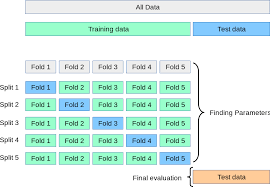



Figura 3: Validação Cruzada - K-fold

## 3.8.1. Estratégia adotada

Na base de treino, será utilizada a técnica de validação cruzada k-fold = 10 para encontrar os melhores hiperparâmetros para os algoritmos, sendo utilizada uma base de validação para analisar a performance do modelo de acordo com a métrica escolhida.

Após, a base de teste será utilizada nos modelos desenvolvidos para analisar a performance, em uma base de dados nunca vista pelos algoritmos, buscando aquele com melhor capacidade de generalização.

In [85]:
kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

## 3.9. Resumo - Pré-processamento

- Separou-se as variáveis explicativas da variável target, e após, dividiu o dataset em treino e teste

- Pré-processamento específico para as variáveis categóricas utilizando o método dummies
 
- Pré-processamento específico para as variáveis numéricas utilizando o método de padronização 

- Após concluir a preparação dos dados, dividiu-se o dataset em treino e teste

- Uso de validação cruzada strafificada devido a proporção da variável resposta

## 4. Modelagem:  Algoritmos de machine learning (Aprendizado de Máquina)

O termo “machine learning” (do inglês, aprendizado de máquina) foi criado por Arthur Samuel em 1959, como sendo a área de estudo que dá aos computadores a habilidade de aprender sem ser explicitamente programado, e trata-se de uma subcategoria da inteligência artificial.

De acordo com os autores Han et al. (2011), “machine learning” é a área de pesquisa que utiliza “programas de computador que automaticamente aprendem a reconhecer padrões complexos e a tomar decisões inteligentes com base em dados”.

Na figura 7, são apresentados as principais técnicas de machine learning.
    

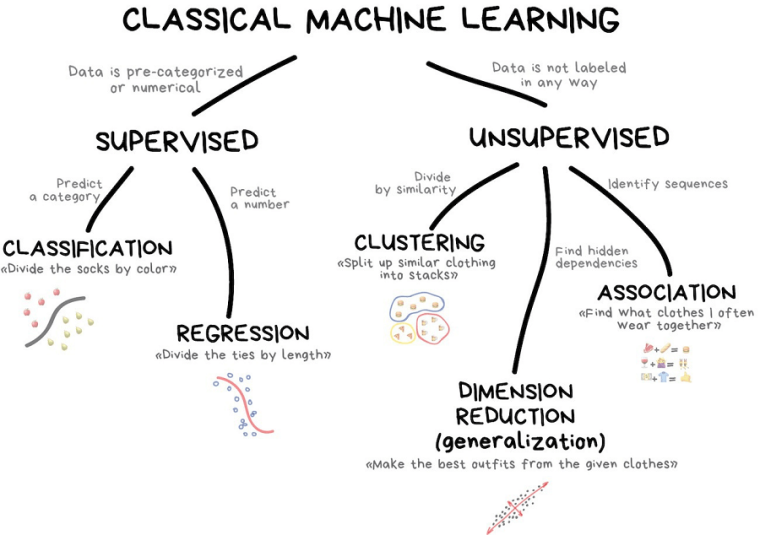

Figura 4: Ténicas de Machine Learning

## 4.1.1. Regressão Logística ##

A regressão logística é um modelo estatístico que tem como objetivo a partir de um conjunto de dados, desenvolver um modelo para prever a probabilidade de um evento definido por Y que se apresenta na forma qualitativa dicotômica (Y = 1, ocorrência do evento de interesse e Y = 0, sendo a ocorrência do não evento) acontecer com base no comportamento de variáveis explicativas.

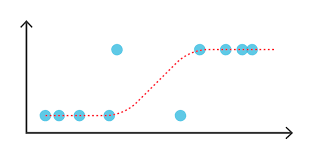

Figura 8: Regressão Logística

## 4.1.2  Árvore de Decisão ##

A Árvore de Decisão é um método de aprendizado supervisionado não paramétrico usado para classificação e regressão. O objetivo é criar um modelo que preveja o valor de uma variável de destino aprendendo regras de decisão simples inferidas a partir dos recursos de dados.

As árvores de decisão aprendem com os dados para aproximar uma curva senoidal com um conjunto de regras de decisão if-then-else. Quanto mais profunda a árvore, mais complexas as regras de decisão.

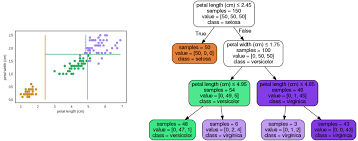

Figura 5: Algoritmo de Árvore de Decisão

## 4.1.4. Random Forest ##

O modelo “Random Forest” foi desenvolvido por Breiman (1996). Esse modelo é composto por um conjunto de árvores de decisão que podem ser de classificação (variável resposta do tipo categórica) ou regressão (variável resposta do tipo numérica) e trata-se de um algoritmo “ensemble bagging de machine learning”. A aplicação desta técnica consiste na criação de muitas árvores de decisão formadas de várias amostras extraídas dos dados originais, tanto de observações quanto de variáveis preditoras. Cada subamostra é criada com reposição, ou seja, uma mesma observação pode ser repetida numa subamostra. Este procedimento é repetido até criar o número de árvores de decisão definidas a priori, formando uma floresta, nome que explica muito bem o funcionamento do algoritmo.
A agregação das previsões das árvores de decisão apresenta um desempenho melhor do que as árvores de decisão individuais. Esse algoritmo fornece a importância de cada variável nos resultados da classificação, ou seja, além da predição, também fornece informações sobre determinantes da separação entre grupos.

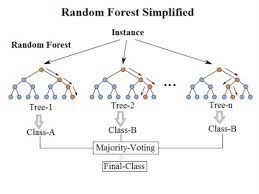

Figura 6: Algoritmo Random Forest

## 4.1.5. XGBoost ##

XGBoost é um dos algoritmos mais utilizados por cientistas de dados, apresentando resultados superiores, principalmente em problemas de previsão envolvendo dados estruturados/tabulares

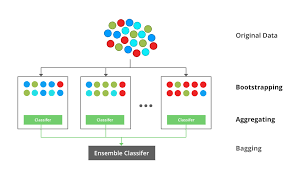

Figura 7: Algoritmo XGboost

## 4.2. Treinamento dos modelos de aprendizado de máquina

Como regra geral, estou definindo a métrica da área abaixo da Curva ROC pois não depende de limiar na validação cruzada, mas analisarei as principais métricas da matriz de confusão

## 4.2.1. Treino do Modelo 01:  Regressão Logística ##

In [152]:
# Os hiperparâmetros "fixos" para instanciar o objeto do modelo

clf1 = LogisticRegression(random_state=42)


# Criando um dicionário com todos os valores que hiperparâmetros que serão testados

params_grid = {
    'max_iter':[1000,2000,3000],
   'C' : np.logspace(-4, 4, 50)}


#Usando o gridsearch para testar todos os valores do grid

clf1_gscv = GridSearchCV(clf1,params_grid,
                        cv=kfold,
                        scoring='roc_auc',
                        n_jobs=1)
 

# Fit do modelo de regressão logística

clf1_gscv.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=LogisticRegression(random_state=42), n_jobs=1,
             param_grid={'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.3...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                         'max_iter': [1000, 2000, 3000]},
             scoring='roc_auc')

In [87]:
# Checando performance do clf1
clf1_gscv.best_params_

{'C': 0.5689866029018293, 'max_iter': 1000}

In [88]:
# Checando a média do score para performance dos valores do clf1
clf1_gscv.best_score_

0.7687074829931972

### Análise e Insights

- Os melhores hiperparâmetros para o modelo de regressão logística foram: {'C': 0.5689866029018293, 'max_iter': 1000}
 
 
- A média da métrica de AUC_ROC na etapa de validação cruzada estratificada com K-fold = 10 foi de 0.7687074829931972
  

## 4.2.1.1. Previsão na amostra teste e matriz de confusão

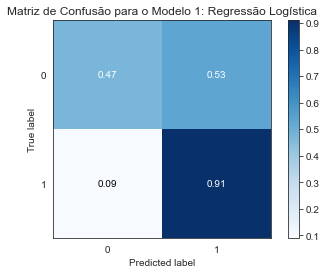

In [89]:
#Regressão Logística
y_pred_rl= clf1_gscv.predict(X_test)

# Compute confusion matrix
skplt.metrics.plot_confusion_matrix(y_test,y_pred_rl, normalize=True, title= 'Matriz de Confusão para o Modelo 1: Regressão Logística');

In [90]:
print(classification_report(y_test,y_pred_rl))
print('AUC ROC: ',round(roc_auc_score(y_test,y_pred_rl), 5))

              precision    recall  f1-score   support

           0       0.69      0.47      0.56        90
           1       0.80      0.91      0.85       210

    accuracy                           0.78       300
   macro avg       0.74      0.69      0.70       300
weighted avg       0.77      0.78      0.76       300

AUC ROC:  0.6881


### Análise e Insights

 - Classificador apresenta bons resultados na base de teste com AUC_ROC de 68,81% e acurácia de 78% (Taxa global de acerto)
 
 - A capacidade de acerto para o evento (Bom risco de crédito  - 1) é de 91%
 

## 4.2.2. Treino do Modelo 02:  Árvore de Decisão ##

In [153]:
# Os hiperparâmetros "fixos" para instanciar o objeto do modelo

clf2 = tree.DecisionTreeClassifier(random_state=42)


# Criando um dicionário com todos os valores que hiperparâmetros que serão testados na árvore de decisão

params_grid = {
    'criterion' : ['gini','entropy'],
    'max_depth' : [2,3,4,5,6,7,8,9]}


#Usando o gridsearch para testar todos os valores do grid
clf2_gscv = GridSearchCV(clf2,params_grid,
                        cv=kfold,
                        scoring='roc_auc',
                        n_jobs=1)
 
    
# Fit do modelo de árvore de decisão

clf2_gscv.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='roc_auc')

In [92]:
# Checando performance dos valores da árvore de decisão
clf2_gscv.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [93]:
# Checando a média do score para performance dos valores da árvore de decisão 
clf2_gscv.best_score_

0.7007288629737609

### Análise e Insights

- Os melhores hiperparâmetros para o modelo de árvore de decisão foram: {'criterion': 'gini', 'max_depth': 3}
 
 
- A média da métrica de AUC_ROC na etapa de validação cruzada estratificada com K-fold = 10 foi 0.7007288629737609
  

## 4.2.2.1. Previsão na amostra teste e matriz de confusão

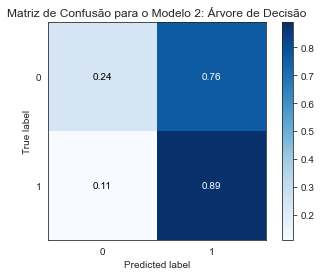

In [94]:
#Árvore de Decisão
y_pred_dt = clf2_gscv.predict(X_test)


# Compute confusion matrix
skplt.metrics.plot_confusion_matrix(y_test,y_pred_dt, normalize=True, title= 'Matriz de Confusão para o Modelo 2: Árvore de Decisão');


In [95]:
print(classification_report(y_test,y_pred_dt))
print('AUC ROC: ',round(roc_auc_score(y_test,y_pred_dt), 5))

              precision    recall  f1-score   support

           0       0.48      0.24      0.32        90
           1       0.73      0.89      0.80       210

    accuracy                           0.69       300
   macro avg       0.61      0.57      0.56       300
weighted avg       0.66      0.69      0.66       300

AUC ROC:  0.56508


### Análise e Insights

- O classificador apresenta baixo poder de predição na base de teste para a métrica AUC_ROC (56,61%)
 
- A capacidade de acerto para o evento (Bom risco de crédito  - 1) é de 89%

## 4.2.3. Treino do Modelo 03:  Random Forest ##

In [ ]:
# Os hiperparâmetros "fixos" para instanciar o objeto do modelo

clf3 =RandomForestClassifier(random_state=42)


# Criando um dicionário com todos os valores que hiperparâmetros que serão testados na random forest

params_grid = {
    'n_estimators': [200, 300, 500,700],
    'max_features': [2,3,4,5,6,7,8],
    'max_depth' : [2,3,4,5,6]
}




clf3_gscv = GridSearchCV(clf3,params_grid,
                        cv=kfold,
                        scoring='roc_auc', 
                        n_jobs=1)
 
    
# Fit do modelo de Random Forest

clf3_gscv.fit(X_train,y_train)

In [99]:
# Checando performance dos valores da random forest
clf3_gscv.best_params_

{'max_depth': 5, 'max_features': 4, 'n_estimators': 300}

In [100]:
# Checando a média do score para performance dos valores da random forest
clf3_gscv.best_score_

0.7554907677356657

### Análise e Insights

- Os melhores hiperparâmetros para o modelo de Random Forest foram: {'max_depth': 5, 'max_features': 4, 'n_estimators': 300}
 
 
- A média da métrica de ROC_AUC na etapa de validação cruzada estratificada com K-fold = 10 foi de 0.7554907677356657

## 4.2.3.1. Previsão na amostra teste e matriz de confusão

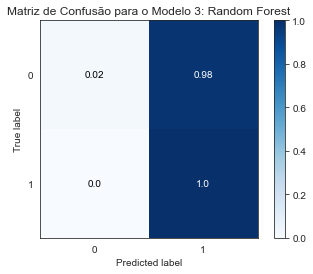

In [101]:
#Random Forest
y_pred_rf = clf3_gscv.predict(X_test)


# Compute confusion matrix
skplt.metrics.plot_confusion_matrix(y_test,y_pred_rf, normalize=True, title= 'Matriz de Confusão para o Modelo 3: Random Forest');


In [102]:
print(classification_report(y_test,y_pred_rf ))
print('AUC ROC: ',round(roc_auc_score(y_test,y_pred_rf ), 5))

              precision    recall  f1-score   support

           0       1.00      0.02      0.04        90
           1       0.70      1.00      0.83       210

    accuracy                           0.71       300
   macro avg       0.85      0.51      0.44       300
weighted avg       0.79      0.71      0.59       300

AUC ROC:  0.51111


### Análise e Insights

- O classificador apresenta baixo poder de predição na base de teste para a métrica AUC_ROC (51,11%)

## 4.2.4. Treino do Modelo 04:  XGboost ##

In [ ]:
# Os hiperparâmetros "fixos" para instanciar o objeto do modelo

clf4 =XGBClassifier(random_state=42)
                        

# Criando um dicionário com todos os valores que hiperparâmetros que serão testados na random forest

params_grid = {
         'min_child_weight': [1,2,3],
        'gamma': [2, 5,6,8],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [5,6,7,8,9] 
}


clf4_gscv = GridSearchCV(clf4,params_grid,
                        cv=kfold,
                        scoring='roc_auc',
                        n_jobs=1)
 
    
# Fit do modelo de Random Forest

clf4_gscv.fit(X_train,y_train)

In [106]:
# Checando performance dos valores do XGboost
clf4_gscv.best_params_

{'colsample_bytree': 0.8,
 'gamma': 2,
 'max_depth': 7,
 'min_child_weight': 3,
 'subsample': 1.0}

In [107]:
# Checando a média do score para performance dos valores do XGboost
clf4_gscv.best_score_

0.7688046647230321

### Análise e Insights

- Os melhores hiperparâmetros para o modelo de XGboost foram: {'colsample_bytree': 0.8,'gamma': 2,'max_depth': 7,'min_child_weight': 3,'subsample': 1.0}
 
 
- A média da métrica de ROC_AUC na etapa de validação cruzada estratificada com K-fold = 10 foi de 0.7688046647230321

## 4.2.3.1. Previsão na amostra teste e matriz de confusão

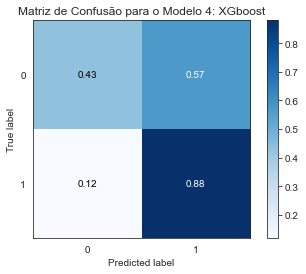

In [108]:
#XGboost
y_pred_XG = clf4_gscv.predict(X_test)


# Compute confusion matrix
skplt.metrics.plot_confusion_matrix(y_test,y_pred_XG, normalize=True, title= 'Matriz de Confusão para o Modelo 4: XGboost');


In [109]:
print(classification_report(y_test,y_pred_XG ))
print('AUC ROC: ',round(roc_auc_score(y_test,y_pred_XG ), 5))

              precision    recall  f1-score   support

           0       0.60      0.43      0.50        90
           1       0.78      0.88      0.83       210

    accuracy                           0.74       300
   macro avg       0.69      0.65      0.67       300
weighted avg       0.73      0.74      0.73       300

AUC ROC:  0.65476


### Análise e Insights

- O classificador apresenta um poder de predição aceitável na base de teste para a métrica AUC_ROC (65,476%)
 
- A capacidade de acerto para o evento (Bom risco de crédito  - 1) é de 88%

## 4.2.5. Resumo - Modelagem

### Análise e Insights:


 - A penúltima etapa do CRISP-DM avaliou os resultados dos modelos de acordo com a  métrica definida, ou seja, a média do resultado da área abaixo da curva ROC na base de teste no processo  da validação cruzada estratificada com 10 folds
 

 - De acordo com a metodologia apresentada nesse projeto, os modelo XGBoost (0.7688046647230321) e da Regressão logística (0.7687074829931972) apresentaram um resultado muito parecido para a métrica AUC_ROC,considerando a base de validação do processo de otimização de hiperparâmetros do GridSearch.
 
 
 - Ao analisar, a base de teste, na tentativa de verificar o modelo com melhor capacidade de generalização, obtivemos os seguintes resultados:
 
     * Regressão Logística: 68,81 %
     
     * XGBoost: 65,48%
     
     
 - Analisando a capacidade de acerto do evento, ter bom risco de crédito (métrica de recall da matriz de confusão) o modelo com melhor desempenho foi a regresão logística (91%), seguido pelo XGBoost (88%)
 
 
 - De acordo com o príncipio dos modelos parcimoniosos, ou seja, optar por modelos mais simples, sem perder em tanto na capacidade preditiva, o modelo com melhor resultado em geral e que será utilizado na proposta de geração de novos insights é o Modelo 1: Regressão Logística, dado que apresenta melhor resultado no contexto geral


## 4.2.6. Salvar o modelo com melhor performance

In [110]:
with open('credit_model_dt.pkl', 'wb') as fid:
    cPickle.dump(clf1_gscv, fid)

## 6. Implementação

Para a última etapa do CRISP-DM, foi produzida uma proposta para utilização do modelo de XGBpoost que após apresentado e validado pelo time de negócios, poderia ser implementado.


* Passo 1. Atribuir probabilidade do cliente ter "Bom risco de crédito" para cada cliente podendo ser utilizado como um "Score/Pontuação"


* Passo 2. Criar Faixa "Score/Pontuação"


* Passo 3. Criar Níveis de risco de crédito


## 6.1.Carregar o modelo 

In [111]:
#Carregando o models para predição em outra base de dados

credit_model = joblib.load('credit_model_dt.pkl')


## 6.2.Atribuir probabilidade para ser "bom cliente"

In [112]:
# Criando uma variável para inserir a probabilidade do cliente ter Crédito ruim
X_final['proba']= credit_model.predict_proba(X_final)[:,1]

In [113]:
# Juntando a variável resposta no dataset
df_result = pd.concat([X_final, y], axis=1, join='inner')

In [114]:
# Analisando as medidas de posição da variável probabilidade
df_result['proba'].describe()

count    1000.000000
mean        0.699938
std         0.216358
min         0.087419
25%         0.537034
50%         0.757460
75%         0.888142
max         0.994237
Name: proba, dtype: float64

In [115]:
# O score utilizado será o de probabilidade de bom risco de crédito
# Criando a variável score que será multiplicado por 1000, que geralmente é o padrão utilizado

df_result['score'] = ((pd.Series(df_result['proba'].tolist()).values)*1000).round(0)

In [116]:
print("10th percentile: ",np.percentile(df_result['score'], 10).round(0))
print("20th percentile: ",np.percentile(df_result['score'], 20).round(0))
print("30th percentile: ",np.percentile(df_result['score'], 30).round(0))
print("40th percentile: ",np.percentile(df_result['score'], 40).round(0))
print("50th percentile: ",np.percentile(df_result['score'], 50).round(0))
print("60th percentile: ",np.percentile(df_result['score'], 60).round(0))
print("70th percentile: ",np.percentile(df_result['score'], 70).round(0))
print("80th percentile: ",np.percentile(df_result['score'], 80).round(0))
print("90th percentile: ",np.percentile(df_result['score'], 90).round(0))
print("100th percentile: ",np.percentile(df_result['score'],100).round(0))

10th percentile:  363.0
20th percentile:  498.0
30th percentile:  588.0
40th percentile:  683.0
50th percentile:  758.0
60th percentile:  812.0
70th percentile:  861.0
80th percentile:  905.0
90th percentile:  939.0
100th percentile:  994.0


## 6.3.Criar Faixa "Score/Pontuação"

Criação da faixa de score, cada faixa de score corresponde a 10% da base de clientes

In [117]:
def faixa(item):
    if (pd.isna(item) == True or item < 0):
        return 'Missing'
    if (item <= 363):
        return '000-363'
    if (item <= 498):
        return '364-498'
    if (item <= 588):
        return '499-588'
    if (item <= 683):
        return '589-683'
    if (item <= 758):
        return '684-758'
    if (item <= 812):
        return '759-812'
    if (item <= 861):
        return '813-861'
    if (item <= 905):
        return '862-905'
    if (item <= 939):
        return '906-939'
    if (item <= 994):
        return '940-994'


In [118]:
df_result["fx_score"] = (df_result['score']).apply(faixa)
df_result.head()

,Duration of Credit (month),Age (years),Payment Status of Previous Credit_1,Payment Status of Previous Credit_2,Payment Status of Previous Credit_3,Payment Status of Previous Credit_4,Foreign Worker_2,Most valuable available asset_2,Most valuable available asset_3,Most valuable available asset_4,...,No of dependents_2,Guarantors_2,Guarantors_3,Instalment per cent_2,Instalment per cent_3,Instalment per cent_4,proba,Creditability,score,fx_score
0,0.205882,0.035714,0,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0.458222,1,458.0,364-498
1,0.073529,0.303571,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0.501353,1,501.0,499-588
2,0.117647,0.071429,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0.724740,1,725.0,684-758
3,0.117647,0.357143,0,0,0,1,1,0,0,0,...,1,0,0,0,1,0,0.738955,1,739.0,684-758
4,0.117647,0.339286,0,0,0,1,1,1,0,0,...,0,0,0,0,0,1,0.766349,1,766.0,759-812


In [120]:
#Analisando a distribuição dos scores
df_result.groupby('fx_score', sort=True)["fx_score"].count()

fx_score
000-363    101
364-498    100
499-588    100
589-683    101
684-758    100
759-812    101
813-861     97
862-905    100
906-939    102
940-994     98
Name: fx_score, dtype: int64

In [146]:
tab_1 = pd.pivot_table(df_result, index = ['fx_score'],
                       values = 'Creditability', aggfunc = 'mean') 
tab_1

tab_1.style.background_gradient(cmap='Greens')

,Creditability
fx_score,
000-363,0.188119
364-498,0.410000
499-588,0.520000
589-683,0.633663
684-758,0.740000
759-812,0.861386
813-861,0.855670
862-905,0.900000
906-939,0.931373


### Análise e Insights:

Na tabela acima, apresenta a taxa de  inadimplência observada, sendo possível analisar que existe ordenação na taxa de bons clientes, ou seja,  ao longo da faixa de score, aumenta a taxa de bons clientes.


## 6.4.Criar Níveis de Risco (Segmentos)

Alinhada à Política de Gestão de Riscos da empresa e com a identificação da probabilidade de fraude de acordo com o modelo, pode-se criar grupos/segmentos para identificar qual o risco médio esperado de inadimplência. Dessa forma, segue sugestão:

In [121]:
print("20th percentile: ",np.percentile(df_result['score'], 20).round(0))
print("40th percentile: ",np.percentile(df_result['score'], 40).round(0))
print("60th percentile: ",np.percentile(df_result['score'], 60).round(0))
print("80th percentile: ",np.percentile(df_result['score'], 80).round(0))
print("100th percentile: ",np.percentile(df_result['score'], 100).round(0))

20th percentile:  498.0
40th percentile:  683.0
60th percentile:  812.0
80th percentile:  905.0
100th percentile:  994.0


In [122]:
# Criando uma nova variável no dataset chamada de "risco de crédito"
df_result.loc[(df_result['score'] <= 498)                       , 'risco'] = '5. Altíssimo'
df_result.loc[(df_result['score'] > 498) & (df_result['score']<=683), 'risco'] = '4. Alto'
df_result.loc[(df_result['score'] > 683) & (df_result['score']<=812), 'risco'] = '3. Medio'
df_result.loc[(df_result['score'] > 812) & (df_result['score']<=905), 'risco'] = '2. Baixo'
df_result.loc[(df_result['score'] > 905)                       , 'risco'] = ' 1.Baixissimo'
df_result

,Duration of Credit (month),Age (years),Payment Status of Previous Credit_1,Payment Status of Previous Credit_2,Payment Status of Previous Credit_3,Payment Status of Previous Credit_4,Foreign Worker_2,Most valuable available asset_2,Most valuable available asset_3,Most valuable available asset_4,...,Guarantors_2,Guarantors_3,Instalment per cent_2,Instalment per cent_3,Instalment per cent_4,proba,Creditability,score,fx_score,risco
0,0.205882,0.035714,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0.458222,1,458.0,364-498,5. Altíssimo
1,0.073529,0.303571,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0.501353,1,501.0,499-588,4. Alto
2,0.117647,0.071429,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0.724740,1,725.0,684-758,3. Medio
3,0.117647,0.357143,0,0,0,1,1,0,0,0,...,0,0,0,1,0,0.738955,1,739.0,684-758,3. Medio
4,0.117647,0.339286,0,0,0,1,1,1,0,0,...,0,0,0,0,1,0.766349,1,766.0,759-812,3. Medio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.294118,0.035714,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0.630273,0,630.0,589-683,4. Alto
996,0.294118,0.464286,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0.456678,0,457.0,364-498,5. Altíssimo
997,0.250000,0.196429,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0.912295,0,912.0,906-939,1.Baixissimo
998,0.117647,0.589286,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0.895324,0,895.0,862-905,2. Baixo


## 6.5. Exportar base com as informações necessárias para o time de negócio

In [124]:
base_escorada = df_result[['fx_score','risco','Creditability']]
base_escorada

,fx_score,risco,Creditability
0,364-498,5. Altíssimo,1
1,499-588,4. Alto,1
2,684-758,3. Medio,1
3,684-758,3. Medio,1
4,759-812,3. Medio,1
...,...,...,...
995,589-683,4. Alto,0
996,364-498,5. Altíssimo,0
997,906-939,1.Baixissimo,0
998,862-905,2. Baixo,0


In [125]:
#Salva a base escorada
path = 'base_escorada_artigo_credit_risk.csv'
base_escorada.to_csv(path, sep = ';', header = True, decimal='.')

### Análise e Insights:

De acordo com os gráficos apresentados nessa seção, além de apresentar  os resultados dos modelos na previsão de inadimplência, destacando o que apresentou  melhor capacidade preditiva, foi possível também construir uma proposta para utilização do  modelo na área de concessão de crédito, sendo esses indicadores extremamente importantes para extrair insights significativos construindo assim, decisões orientadas por dados.


## 7. Conclusão 

Modelos de risco de crédito trazem ganhos financeiros significativos para as empresas que concedem crédito, e com o expressivo crescimento no volume de dados e com o uso de novas técnicas de inteligência artificial, um modelo de previsão de inadimplência que apresente pequenas melhorias na classificação de bons e maus clientes permitem uma melhor concessão de crédito, além de minimizar o risco de perdas para as instituições financeiras.


Assim, o  estudo desenvolvido , seguiu as etapas da metodologia ágil CRISP-DM para comparar o desempenho da regressão logística que é amplamente aplicada nos modelos de risco de crédito de bancos e empresas financeiras com três outros modelos de aprendizagem de máquina, a árvore de decisão, a Random Forest e o XGBoost.


Como medida de performance na comparação dos modelos, foi escolhida a métrica da área abaixo da curva ROC por fornecer uma medida de precisão total independente, além do uso da validação cruzada estratificada com 10 folds que permite avaliar a capacidade de generalização de um modelo.


Os resultados da metodologia desenvolvida nesse estudo, foi possível observar que os quatro modelos implementados nesse trabalho apresentaram resultados satisfatórios na previsão de inadimplência, com o algoritmo da Regressão Logística obtendo o melhor desempenho para a métrica da área abaixo da curva.
